In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [292]:
data2 = pd.read_csv('COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv')

In [293]:
data2_nec = data2[['Date', 'Location', 'Administered', 'Administered_12Plus',  'Administered_18Plus', 'Administered_65Plus', 'Additional_Doses_12Plus', 'Additional_Doses_18Plus', 'Additional_Doses_50Plus', 'Additional_Doses_65Plus']]

In [295]:
data2_nec.head(50)

,Date,Location,Administered,Administered_12Plus,Administered_18Plus,Administered_65Plus,Additional_Doses_12Plus,Additional_Doses_18Plus,Additional_Doses_50Plus,Additional_Doses_65Plus
0,05/13/2022,MA,15002124,14418733,13465231,3510608,2811095.0,2683608.0,1569476.0,808208.0
1,05/13/2022,DE,1831812,1779108,1668303,559672,309908.0,298637.0,212453.0,126184.0
2,05/13/2022,VA,16621143,15966831,14839986,3881530,2972308.0,2838592.0,1746117.0,936092.0
3,05/13/2022,GU,353769,337353,303545,48954,62001.0,58437.0,31001.0,12383.0
4,05/13/2022,NV,4930247,4810720,4513529,1236610,728898.0,708841.0,468467.0,265012.0
5,05/13/2022,PR,7211476,6890803,6335945,1764378,1553918.0,1431717.0,813398.0,421852.0
6,05/13/2022,FL,37794172,37032532,35118815,12475084,5836077.0,5710061.0,4188220.0,2575916.0
7,05/13/2022,GA,15015027,14629980,13724945,3656288,2206736.0,2145995.0,1403142.0,751830.0
8,05/13/2022,AK,1153223,1110812,1033163,230938,199914.0,191529.0,114980.0,58669.0
9,05/13/2022,RI,2238343,2166613,2031825,574303,471769.0,453067.0,280658.0,148220.0


In [43]:
data2_nec['Administered_diff'] = data2_nec['Administered'].diff().fillna(0)
data2_nec['Administered_12Plus_diff'] = data2_nec['Administered_12Plus'].diff().fillna(0)
data2_nec['Administered_18Plus_diff'] = data2_nec['Administered_18Plus'].diff().fillna(0)
data2_nec['Administered_65Plus_diff'] = data2_nec['Administered_65Plus'].diff().fillna(0)

data2_nec = data2_nec[data2_nec['Administered_diff'] >= 0.0]
data2_nec = data2_nec[data2_nec['Administered_12Plus_diff'] >= 0.0]
data2_nec = data2_nec[data2_nec['Administered_18Plus_diff'] >= 0.0]
data2_nec = data2_nec[data2_nec['Administered_65Plus_diff'] >= 0.0]


In [5]:
data_dem2 = pd.read_excel('demog.xlsx')

In [525]:
data_state = pd.read_excel('state.xlsx')

In [526]:
state_series = data_state['state'].squeeze()

In [8]:
def get_info(XX, state, df2, b):
    listo = list(date_series_str)
    for x in listo:
        df = df2[df2['Date'] == XX] 
        df = df[df['Location'] == state]
        a = df[b]
        if df.size == 0:
            return float('nan')
        else:
            return a.squeeze()

In [9]:
def get_pop(state, df2, b):
    listo = list(state_series)
    for x in listo:
        df = df2[df2['state'] == state] 
        a = df[b]
        if df.size == 0:
            return float('nan')
        else:
            return a.squeeze()

In [11]:
get_pop('AL', data_dem2, '65+')

834700

In [57]:
data_date = pd.read_excel('date-vacc2.xlsx')

In [179]:
data_date_flu = pd.read_excel('date-vacc3.xlsx')

In [180]:
date_series_flu = data_date_flu['date'].squeeze()
date_series_str_flu = date_series_flu.dt.strftime('%Y-%m-%d')

In [181]:
date_series_str_flu

0      2022-06-11
1      2022-06-12
2      2022-06-13
3      2022-06-14
4      2022-06-15
          ...    
353    2023-05-30
354    2023-05-31
355    2023-06-01
356    2023-06-02
357    2023-06-03
Name: date, Length: 358, dtype: object

In [182]:
def get_info2(XX, state, df2, age, b):
    listo = list(date_series_str)
    for x in listo:
        df = df2[df2['Week_Ending_Sat'] == XX] 
        df = df[df['location_name'] == get_state(state, state_abv)]
        df = df[df['Age'] == age]
        a = df[b]
        if df.size == 0:
            return float('nan')
        else:
            return a.squeeze()

In [183]:
get_info2('2023-06-03', 'TX', get_flu_cov, '50-64 Years', 'Boost.coverage.rd14.sc_C_D')

43.29

In [184]:
get_flu_cov = pd.read_csv('Adult_Coverage_RD14_Sc_C_D.csv')

In [198]:
def state_flu(state):
    flu_cov = pd.DataFrame(columns = ['date', '19_49', '50_64', '65+'])

    for date in date_series_str_flu: 
        
        lvl_65 = get_info2(date, state, get_flu_cov, '>65 Years', 'Boost.coverage.rd14.sc_C_D')
        lvl_50 = get_info2(date, state, get_flu_cov, '50-64 Years', 'Boost.coverage.rd14.sc_C_D')
        lvl_18 = get_info2(date, state, get_flu_cov, '18-49 Years', 'Boost.coverage.rd14.sc_C_D')
        flu_cov = flu_cov.append({'date' : date, '19_49' : lvl_18, '50_64' : lvl_50, '65+' : lvl_65}, 
                    ignore_index = True)

    return flu_cov

In [186]:
flu_cov_TX = state_flu('TX')

0.0
nan
nan
nan
nan
nan
nan
0.0
nan
nan
nan
nan
nan
nan
0.0
nan
nan
nan
nan
nan
nan
0.0
nan
nan
nan
nan
nan
nan
0.0
nan
nan
nan
nan
nan
nan
0.0
nan
nan
nan
nan
nan
nan
0.0
nan
nan
nan
nan
nan
nan
0.0
nan
nan
nan
nan
nan
nan
0.0
nan
nan
nan
nan
nan
nan
0.0
nan
nan
nan
nan
nan
nan
0.0
nan
nan
nan
nan
nan
nan
0.0
nan
nan
nan
nan
nan
nan
0.0
nan
nan
nan
nan
nan
nan
0.0
nan
nan
nan
nan
nan
nan
0.0
nan
nan
nan
nan
nan
nan
0.0
nan
nan
nan
nan
nan
nan
0.0
nan
nan
nan
nan
nan
nan
0.647031292088291
nan
nan
nan
nan
nan
nan
4.16221131900213
nan
nan
nan
nan
nan
nan
9.187805878297882
nan
nan
nan
nan
nan
nan
13.9477565298088
nan
nan
nan
nan
nan
nan
16.6995401333056
nan
nan
nan
nan
nan
nan
18.1136031286817
nan
nan
nan
nan
nan
nan
19.237090821002
nan
nan
nan
nan
nan
nan
20.1353567335081
nan
nan
nan
nan
nan
nan
20.8737543894416
nan
nan
nan
nan
nan
nan
21.497545032228498
nan
nan
nan
nan
nan
nan
22.0198130526236
nan
nan
nan
nan
nan
nan
22.473758606410303
nan
nan
nan
nan
nan
nan
22.893032134643
nan
nan
nan

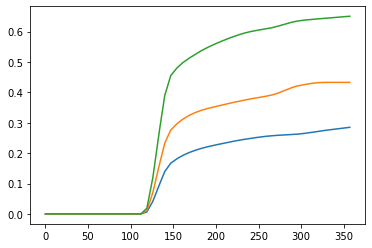

In [193]:
flu_cov_TX = flu_cov_TX.interpolate()
plt.plot(0.01*flu_cov_TX['19_49'])
plt.plot(0.01*flu_cov_TX['50_64'])
plt.plot(0.01*flu_cov_TX['65+'])

In [242]:
state_abv= pd.read_csv('states.csv')

In [243]:
def get_state(state, df2):
    df = df2[df2['Abbreviation'] == state]
    a = df['State']
    if df.size == 0:
        return float('nan')
    else:
        return a.squeeze()

In [245]:
get_state('US' , state_abv)

'United States'

In [143]:
get_flu_cov

,location_name,Age,Population,Week_Ending_Sat,Boost.coverage.rd14.sc_C_D
0,Alabama,18-49 Years,1937824,2022-06-11,0.000000
1,Alabama,18-49 Years,1937824,2022-06-18,0.000000
2,Alabama,18-49 Years,1937824,2022-06-25,0.000000
3,Alabama,18-49 Years,1937824,2022-07-02,0.000000
4,Alabama,18-49 Years,1937824,2022-07-09,0.000000
...,...,...,...,...,...
8263,United States,>65 Years,52122749,2023-05-06,66.801637
8264,United States,>65 Years,52122749,2023-05-13,67.014633
8265,United States,>65 Years,52122749,2023-05-20,67.223034
8266,United States,>65 Years,52122749,2023-05-27,67.417981


In [58]:
date_series = data_date['date'].squeeze()
date_series_str = date_series.dt.strftime('%m/%d/%Y')

In [ ]:
date_series = data_date['date'].squeeze()
date_series_str = date_series.dt.strftime('%m/%d/%Y')

In [59]:
date_series_str

0      10/01/2021
1      10/02/2021
2      10/03/2021
3      10/04/2021
4      10/05/2021
          ...    
102    01/11/2022
103    01/12/2022
104    01/13/2022
105    01/14/2022
106    01/15/2022
Name: date, Length: 107, dtype: object

In [45]:
deb_date = '02/07/2022'
mid_date = '02/21/2022'
end_date = '04/25/2022'
old_date = '11/26/2021'
oldd_date = '12/25/2021'
state = 'US'
data_dem = (get_pop(state, data_dem2, '0_4'), get_pop(state, data_dem2, '5_11'), get_pop(state, data_dem2, '12_18'), get_pop(state, data_dem2, '19_49'), get_pop(state, data_dem2, '50_64'), get_pop(state, data_dem2, '65+'))

In [533]:
def primary(state):
    doses_series = pd.DataFrame(columns = ['date', '0_4', '5_11', '12_18', '19_49', '50_64', '65+'])
    cov_65 = 0
    cov_50_64 = 0
    cov_19_49 = 0
    cov_12_18 = 0
    cov_5_11 = 0

    i = 0
    deb_65 = get_info(deb_date, state, data2_nec, 'Administered_65Plus') 
    mid_65 = get_info(mid_date, state, data2_nec, 'Administered_65Plus') 
    fin_65 = get_info(end_date, state, data2_nec, 'Administered_65Plus') 

    deb_50_64 = (get_info(deb_date, state, data2_nec, 'Administered_18Plus') - get_info(deb_date, state, data2_nec, 'Administered_65Plus'))*(data_dem[4]/(data_dem[3] + data_dem[5])) 
    mid_50_64 = (get_info(mid_date, state, data2_nec, 'Administered_18Plus') - get_info(mid_date, state, data2_nec, 'Administered_65Plus'))*(data_dem[4]/(data_dem[3] + data_dem[5])) 
    fin_50_64 = (get_info(end_date, state, data2_nec, 'Administered_18Plus') - get_info(end_date, state, data2_nec, 'Administered_65Plus'))*(data_dem[4]/(data_dem[3] + data_dem[5]))  

    deb_19_49 = (get_info(deb_date, state, data2_nec, 'Administered_18Plus') - get_info(deb_date, state, data2_nec, 'Administered_65Plus'))*(data_dem[3]/(data_dem[3] + data_dem[5])) 
    mid_19_49 = (get_info(mid_date, state, data2_nec, 'Administered_18Plus') - get_info(mid_date, state, data2_nec, 'Administered_65Plus'))*(data_dem[3]/(data_dem[3] + data_dem[5]))  
    fin_19_49 = (get_info(end_date, state, data2_nec, 'Administered_18Plus') - get_info(end_date, state, data2_nec, 'Administered_65Plus'))*(data_dem[3]/(data_dem[3] + data_dem[5]))  

    deb_12_18 = (get_info(deb_date, state, data2_nec, 'Administered_12Plus') - get_info(deb_date, state, data2_nec, 'Administered_18Plus'))
    fin_12_18 = (get_info(mid_date, state, data2_nec, 'Administered_12Plus') - get_info(end_date, state, data2_nec, 'Administered_18Plus')) 
    fin_12_18 = (get_info(end_date, state, data2_nec, 'Administered_12Plus') - get_info(end_date, state, data2_nec, 'Administered_18Plus')) 


    deb_5_11 = (get_info(deb_date, state, data2_nec, 'Administered') - get_info(deb_date, state, data2_nec, 'Administered_12Plus'))
    fin_5_11 = (get_info(mid_date, state, data2_nec, 'Administered') - get_info(end_date, state, data2_nec, 'Administered_12Plus')) 
    fin_5_11 = (get_info(end_date, state, data2_nec, 'Administered') - get_info(end_date, state, data2_nec, 'Administered_12Plus')) 


    dif_65 = fin_65 - deb_65
    dif_50_64 = fin_50_64 - deb_50_64
    dif_19_49 = fin_19_49 - deb_19_49
    dif_12_18 = fin_12_18 - deb_12_18
    dif_5_11 = fin_5_11 - deb_5_11

    print(data_dem)

    for i in range(550):    
        if (i < 80):   

            cov_65 = deb_65 + i*dif_65/160
            cov_50_64 = deb_50_64 + i*dif_50_64/80
            cov_19_49 = deb_19_49 + i*dif_19_49/80
            cov_12_18 = deb_12_18 + i*dif_12_18/80
            cov_5_11 = deb_5_11 + i*dif_5_11/80
                                                                                      
        else:
            old_cov_65 = cov_65
            old_cov_50_64 = cov_50_64
            old_cov_19_49 = cov_19_49
            old_cov_12_18 = cov_12_18
            old_cov_5_11 = cov_5_11


            cov_65 = old_cov_65

            if (old_cov_50_64 + dif_50_64/80 <= 2*0.88*data_dem[4]):
                cov_50_64 = old_cov_50_64 + dif_50_64/80
            else:
                cov_50_64 = old_cov_50_64

            if (old_cov_19_49 + dif_19_49/80 <= 2*0.9*data_dem[3]):
                cov_19_49 = old_cov_19_49 + dif_19_49/80
            else:
                cov_19_49 = old_cov_19_49

            if (old_cov_12_18 + dif_12_18/80 <= 2*0.80*data_dem[2]):
                cov_12_18 = old_cov_12_18 + dif_12_18/80
            else:
                cov_12_18 =  old_cov_12_18


            if (old_cov_5_11 + dif_5_11 <= 2*0.5*data_dem[1]):
                cov_5_11 = old_cov_5_11 + dif_5_11/80
            else:
                cov_5_11 =  old_cov_5_11

        if (i % 1000 == 0):
            print(i)
        doses_series = doses_series.append({'date' : i, '0_4' : 0, '5_11' : cov_5_11, '12_18' : cov_12_18, '19_49' : cov_19_49, '50_64' : cov_50_64, '65+' : cov_65}, 
                    ignore_index = True)
        
    doses_series['65_diff'] = doses_series['65+'].diff().fillna(0)
    doses_series['50_64_diff'] = doses_series['50_64'].diff().fillna(0)
    doses_series['19_49_diff'] = doses_series['19_49'].diff().fillna(0)
    doses_series['12_18_diff'] = doses_series['12_18'].diff().fillna(0)
    doses_series['5_11_diff'] = doses_series['5_11'].diff().fillna(0) 
    return doses_series

In [631]:
def booster(state):
    booster_doses2 = pd.DataFrame(columns = ['date', '0_4', '5_11', '12_18', '19_49', '50_64', '65+'])
    i = 0
    dd1_65 =  get_info(deb_date, state, data2_nec, 'Additional_Doses_65Plus')     
    dd2_65 =  get_info(end_date, state, data2_nec, 'Additional_Doses_65Plus')        
    
    dd1_50_64 =  get_info(deb_date, state, data2_nec, 'Additional_Doses_50Plus') - dd1_65
    dd2_50_64 =  get_info(end_date, state, data2_nec, 'Additional_Doses_50Plus') - dd2_65
    
    dd1_19_49 = get_info(deb_date, state, data2_nec, 'Additional_Doses_18Plus') - get_info(deb_date, state, data2_nec, 'Additional_Doses_50Plus')
    dd2_19_49 = get_info(end_date, state, data2_nec, 'Additional_Doses_18Plus') - get_info(end_date, state, data2_nec, 'Additional_Doses_50Plus')

    
    dd1_12_18 = get_info(deb_date, state, data2_nec, 'Additional_Doses_12Plus') - get_info(deb_date, state, data2_nec, 'Additional_Doses_18Plus')
    dd2_12_18 = get_info(end_date, state, data2_nec, 'Additional_Doses_12Plus') - get_info(end_date, state, data2_nec, 'Additional_Doses_18Plus')
    

    dif_65 = dd2_65 - dd1_65
    dif_50_64 = dd2_50_64 - dd1_50_64
    dif_19_49 = dd2_19_49 - dd1_19_49
    dif_12_18 = dd2_12_18 - dd1_12_18

    base_65 = 0
    base_50_64 = 0
    base_19_49 = 0

    data_dem = (get_pop(state, data_dem2, '0_4'), get_pop(state, data_dem2, '5_11'), get_pop(state, data_dem2, '12_18'), get_pop(state, data_dem2, '19_49'), get_pop(state, data_dem2, '50_64'), get_pop(state, data_dem2, '65+'))
    

    for i in range(500):    
        if (i < 80):
            cov_65 = dd1_65 + i*dif_65/80
            cov_50_64 = dd1_50_64 + i*dif_50_64/80
            cov_19_49 = dd1_19_49 + i*dif_19_49/80
            cov_12_18 = dd1_12_18 + i*dif_12_18/80

            
        else:
            if (i < 124):
            
                old_cov_65 = cov_65
                old_cov_50_64 = cov_50_64
                old_cov_19_49 = cov_19_49
                old_cov_12_18 = cov_12_18

                if (old_cov_65 + dif_65/80 <= 1*0.9*data_dem[5]):
                    cov_65 = old_cov_65 + dif_65/80
                else:
                    cov_65 = old_cov_65

                if (old_cov_50_64 + dif_50_64/80 <=  1*0.9*data_dem[4]):
                    cov_50_64 = old_cov_50_64 + dif_50_64/80
                else:
                    cov_50_64 = old_cov_50_64

                if (old_cov_19_49 + dif_19_49/80 <= 1*0.88*data_dem[3]):
                    cov_19_49 = old_cov_19_49 + dif_19_49/80
                else:
                    cov_19_49 = old_cov_19_49

                if (old_cov_12_18 + dif_12_18/80 <= 1*0.80*data_dem[2]):
                    cov_12_18 = old_cov_12_18 + dif_12_18/80
                else:
                    cov_12_18 =  old_cov_12_18


            else:          
                if (i == 124):
                    base_65 = cov_65
                    base_50_64 = cov_50_64
                    base_19_49 = cov_19_49
                    
                    
                    flu_cov_state = state_flu(state)
                    flu_cov_state = flu_cov_state.interpolate()
                    
                    v_65 = flu_cov_state['65+'].to_numpy()
                    v_50_64 = flu_cov_state['50_64'].to_numpy()
                    v_19_49 = flu_cov_state['19_49'].to_numpy()
                    
                    dose_65 = v_65*0.01*data_dem[5]
                    dose_50_64 = v_50_64*0.01*data_dem[4]
                    dose_19_49 = v_19_49*0.01*data_dem[3]
                    cov_65 = cov_65 + dif_65/80
                    cov_50_64 = cov_50_64 + dif_50_64/80
                    cov_19_49 = cov_19_49 + dif_19_49/80
                    cov_12_18 = cov_12_18 + dif_12_18/80

                else:
                    if (i < 481):
                        date_to = date_series_str_flu[i-124]

                        old_cov_12_18 = cov_12_18
                        old_cov_65 = cov_65
                        old_cov_50_64 = cov_50_64
                        old_cov_19_49 = cov_19_49
                        old_cov_12_18 = cov_12_18
                    

                        cov_65 = max(base_65 + 0.9*dose_65[i-124], old_cov_65 + dif_65/80) 
                        cov_50_64 = max(base_50_64 + 0.9*dose_50_64[i-124], old_cov_50_64 + dif_50_64/80)
                        cov_19_49 = max(base_19_49 + 0.9*dose_19_49[i-124], old_cov_19_49 + dif_19_49/80)

                        if (old_cov_12_18 + dif_12_18/80 <= 2*0.7*0.80*data_dem[2]):
                            cov_12_18 = old_cov_12_18 + dif_12_18/80
                        else:
                            cov_12_18 =  old_cov_12_18  
                    else:
                        old_cov_65 = cov_65
                        old_cov_50_64 = cov_50_64
                        old_cov_19_49 = cov_19_49
                        old_cov_12_18 = cov_12_18

                        if (old_cov_65 + dif_65/80 <= 0.7*0.9*data_dem[5]):
                            cov_65 = old_cov_65 + dif_65/80
                        else:
                            cov_65 = old_cov_65

                        if (old_cov_50_64 + dif_50_64/80 <=  0.7*0.9*data_dem[4]):
                            cov_50_64 = old_cov_50_64 + dif_50_64/80
                        else:
                            cov_50_64 = old_cov_50_64

                        if (old_cov_19_49 + dif_19_49/80 <= 0.7*0.88*data_dem[3]):
                            cov_19_49 = old_cov_19_49 + dif_19_49/80
                        else:
                            cov_19_49 = old_cov_19_49

                        if (old_cov_12_18 + dif_12_18/80 <= 0.7*0.80*data_dem[2]):
                            cov_12_18 = old_cov_12_18 + dif_12_18/80
                        else:
                            cov_12_18 =  old_cov_12_18
                    #print(new_cov_65, ' ', base_65)

            
        if (i % 1000 == 0):
            print(i)
        booster_doses2 = booster_doses2.append({'date' : i, '0_4' : 0, '5_11' : 0, '12_18' : cov_12_18, '19_49' : cov_19_49, '50_64' : cov_50_64, '65+' : cov_65}, 
                ignore_index = True)
        
    booster_doses2['65_diff'] = booster_doses2['65+'].diff().fillna(0)
    booster_doses2['50_64_diff'] = booster_doses2['50_64'].diff().fillna(0)
    booster_doses2['19_49_diff'] = booster_doses2['19_49'].diff().fillna(0)
    booster_doses2['12_18_diff'] = booster_doses2['12_18'].diff().fillna(0)
    booster_doses2['5_11_diff'] = booster_doses2['5_11'].diff().fillna(0) 
    return booster_doses2

In [308]:
get_info('05/13/2022', 'AK', data2_nec, 'Administered_65Plus') 

230938

In [297]:
get_info('05/13/2022', 'OR', data2_nec, 'Administered_65Plus') 

2124575

In [538]:
date_series_str_flu

0      2022-06-11
1      2022-06-12
2      2022-06-13
3      2022-06-14
4      2022-06-15
          ...    
353    2023-05-30
354    2023-05-31
355    2023-06-01
356    2023-06-02
357    2023-06-03
Name: date, Length: 358, dtype: object

In [569]:
TX_boost = booster('TX')

0


In [262]:
flu_cov_state = state_flu('AK')

In [264]:
flu_cov_state = flu_cov_state.interpolate()
flu_cov_state

,date,19_49,50_64,65+
0,2022-06-11,0.000000,0.000000,0.000000
1,2022-06-12,0.000000,0.000000,0.000000
2,2022-06-13,0.000000,0.000000,0.000000
3,2022-06-14,0.000000,0.000000,0.000000
4,2022-06-15,0.000000,0.000000,0.000000
...,...,...,...,...
353,2023-05-30,30.751340,46.768706,57.490504
354,2023-05-31,30.757077,46.830226,57.495242
355,2023-06-01,30.762814,46.891746,57.499980
356,2023-06-02,30.768551,46.953267,57.504718


In [226]:
TX_boost

,date,0_4,5_11,12_18,19_49,50_64,65+,65_diff,50_64_diff,19_49_diff,12_18_diff,5_11_diff
0,0.0,0.0,0.0,170899.000,2.194828e+06,1.699689e+06,1.893947e+06,0.000000,0.00,0.000000,0.000,0.0
1,1.0,0.0,0.0,171756.625,2.198663e+06,1.701977e+06,1.896143e+06,2195.712500,2287.95,3834.962500,857.625,0.0
2,2.0,0.0,0.0,172614.250,2.202498e+06,1.704265e+06,1.898338e+06,2195.712500,2287.95,3834.962500,857.625,0.0
3,3.0,0.0,0.0,173471.875,2.206333e+06,1.706553e+06,1.900534e+06,2195.712500,2287.95,3834.962500,857.625,0.0
4,4.0,0.0,0.0,174329.500,2.210168e+06,1.708841e+06,1.902730e+06,2195.712500,2287.95,3834.962500,857.625,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
475,475.0,0.0,0.0,276386.875,3.878875e+07,2.947177e+07,3.643012e+07,11559.472311,0.00,42595.471633,0.000,0.0
476,476.0,0.0,0.0,276386.875,3.883135e+07,2.947177e+07,3.644168e+07,11559.472311,0.00,42595.471633,0.000,0.0
477,477.0,0.0,0.0,276386.875,3.887394e+07,2.947177e+07,3.645324e+07,11559.472311,0.00,42595.471633,0.000,0.0
478,478.0,0.0,0.0,276386.875,3.891654e+07,2.947177e+07,3.646480e+07,11559.472311,0.00,42595.471633,0.000,0.0


In [227]:
TX_boostx = TX_boost['19_49'].to_numpy()

0


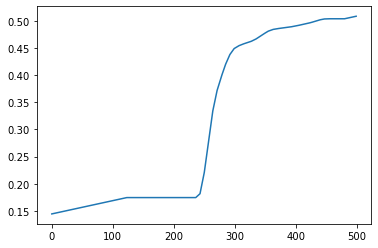

In [542]:
state = 'AR'
TX_boost = booster(state)
TX_boostx = TX_boost['19_49'].to_numpy()
data_dem = (get_pop(state, data_dem2, '0_4'), get_pop(state, data_dem2, '5_11'), get_pop(state, data_dem2, '12_18'), get_pop(state, data_dem2, '19_49'), get_pop(state, data_dem2, '50_64'), get_pop(state, data_dem2, '65+'))
plt.plot(TX_boostx/data_dem[3])

In [260]:
TX_boost

,date,0_4,5_11,12_18,19_49,50_64,65+,65_diff,50_64_diff,19_49_diff,12_18_diff,5_11_diff
0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
475,475.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
476,476.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
477,477.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
478,478.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [391]:
def booster2(state):
    booster_doses3 = pd.DataFrame(columns = ['date', '0_4', '5_11', '12_18', '19_49', '50_64', '65+'])
    i = 0
    dd1_65 =  get_info(deb_date, state, data2_nec, 'Additional_Doses_65Plus')     
    dd2_65 =  get_info(end_date, state, data2_nec, 'Additional_Doses_65Plus')        
    
    dd1_50_64 =  get_info(deb_date, state, data2_nec, 'Additional_Doses_50Plus') - dd1_65
    dd2_50_64 =  get_info(end_date, state, data2_nec, 'Additional_Doses_50Plus') - dd2_65
    
    dd1_19_49 = get_info(deb_date, state, data2_nec, 'Additional_Doses_18Plus') - get_info(deb_date, state, data2_nec, 'Additional_Doses_50Plus')
    dd2_19_49 = get_info(end_date, state, data2_nec, 'Additional_Doses_18Plus') - get_info(end_date, state, data2_nec, 'Additional_Doses_50Plus')

    
    dd1_12_18 = get_info(deb_date, state, data2_nec, 'Additional_Doses_12Plus') - get_info(deb_date, state, data2_nec, 'Additional_Doses_18Plus')
    dd2_12_18 = get_info(end_date, state, data2_nec, 'Additional_Doses_12Plus') - get_info(end_date, state, data2_nec, 'Additional_Doses_18Plus')
    

    dif_65 = dd2_65 - dd1_65
    dif_50_64 = dd2_50_64 - dd1_50_64
    dif_19_49 = dd2_19_49 - dd1_19_49
    dif_12_18 = dd2_12_18 - dd1_12_18

    base_65 = 0
    base_50_64 = 0
    base_19_49 = 0
    data_dem = (get_pop(state, data_dem2, '0_4'), get_pop(state, data_dem2, '5_11'), get_pop(state, data_dem2, '12_18'), get_pop(state, data_dem2, '19_49'), get_pop(state, data_dem2, '50_64'), get_pop(state, data_dem2, '65+'))
    

    for i in range(500):    
        if (i < 80):
            cov_65 = dd1_65 + i*dif_65/80
            cov_50_64 = dd1_50_64 + i*dif_50_64/80
            cov_19_49 = dd1_19_49 + i*dif_19_49/80
            cov_12_18 = dd1_12_18 + i*dif_12_18/80

            
        else:
            if (i < 234):
            
                old_cov_65 = cov_65
                old_cov_50_64 = cov_50_64
                old_cov_19_49 = cov_19_49
                old_cov_12_18 = cov_12_18

                if (old_cov_65 + dif_65/80 <= 0.7*0.9*data_dem[5]):
                    cov_65 = old_cov_65 + dif_65/80
                else:
                    cov_65 = old_cov_65

                if (old_cov_50_64 + dif_50_64/80 <=  0.7*0.9*data_dem[4]):
                    cov_50_64 = old_cov_50_64 + dif_50_64/80
                else:
                    cov_50_64 = old_cov_50_64

                if (old_cov_19_49 + dif_19_49/80 <= 0.7*0.88*data_dem[3]):
                    cov_19_49 = old_cov_19_49 + dif_19_49/80
                else:
                    cov_19_49 = old_cov_19_49

                if (old_cov_12_18 + dif_12_18/80 <= 0.7*0.80*data_dem[2]):
                    cov_12_18 = old_cov_12_18 + dif_12_18/80
                else:
                    cov_12_18 =  old_cov_12_18


            else:          
                if (i == 234):
                    base_65 = cov_65
                    base_50_64 = cov_50_64
                    base_19_49 = cov_19_49
                    
                    n_test = 1
                    init_cov_65 = get_info('10/10/2021', state, data2_nec, 'Additional_Doses_65Plus')   
                    init_cov_50_64 = get_info('10/10/2021', state, data2_nec, 'Additional_Doses_50Plus') - get_info('10/10/2021', state, data2_nec, 'Additional_Doses_65Plus')   
                    init_cov_19_49 =  get_info('10/10/2021', state, data2_nec, 'Additional_Doses_18Plus') - get_info('10/10/2021', state, data2_nec, 'Additional_Doses_50Plus')        

                    print(init_cov_65)
                else: 

                    if (i  < 340):
                        
                        date_to = date_series_str[i-234]
                        if (n_test == 1):
                            init_cov_65 = get_info(date_to, state, data2_nec, 'Additional_Doses_65Plus')   
                            init_cov_50_64 = get_info(date_to, state, data2_nec, 'Additional_Doses_50Plus') - get_info(date_to, state, data2_nec, 'Additional_Doses_65Plus')   
                            init_cov_19_49 =  get_info(date_to, state, data2_nec, 'Additional_Doses_18Plus') - get_info(date_to, state, data2_nec, 'Additional_Doses_50Plus')        
                        
                        if (init_cov_65 != 0 and n_test == 1):
                            n_test = 0
                            print('yy')
                        new_cov_65 = get_info(date_to , state, data2_nec, 'Additional_Doses_65Plus')   
                        new_cov_50_64 = get_info(date_to , state, data2_nec, 'Additional_Doses_50Plus') - get_info(date_to , state, data2_nec, 'Additional_Doses_65Plus')   
                        new_cov_19_49 =  get_info(date_to , state, data2_nec, 'Additional_Doses_18Plus') - get_info(date_to , state, data2_nec, 'Additional_Doses_50Plus')        
                
                        cov_65 = base_65 + 0.85*(new_cov_65 - init_cov_65)
                        cov_50_64 = base_50_64 + 0.85*(new_cov_50_64 - init_cov_50_64)
                        cov_19_49 = base_19_49 + 0.18*0.85*(new_cov_19_49 - init_cov_19_49)
                        print(init_cov_65)

                    else:
                        old_cov_65 = cov_65
                        old_cov_50_64 = cov_50_64
                        old_cov_19_49 = cov_19_49
                        old_cov_12_18 = cov_12_18

                        if (old_cov_65 + dif_65/80 <= 2*0.7*0.9*data_dem[5]):
                            cov_65 = old_cov_65 + dif_65/80
                        else:
                            cov_65 = old_cov_65

                        if (old_cov_50_64 + dif_50_64/80 <=  2*0.7*0.9*data_dem[4]):
                            cov_50_64 = old_cov_50_64 + dif_50_64/80
                        else:
                            cov_50_64 = old_cov_50_64

                        if (old_cov_19_49 + dif_19_49/80 <= 2*0.7*0.88*data_dem[3]):
                            cov_19_49 = old_cov_19_49 + dif_19_49/80
                        else:
                            cov_19_49 = old_cov_19_49

                        if (old_cov_12_18 + dif_12_18/80 <= 2*0.7*0.80*data_dem[2]):
                            cov_12_18 = old_cov_12_18 + dif_12_18/80
                        else:
                            cov_12_18 =  old_cov_12_18                       

            
        if (i % 1000 == 0):
            print(i)
        booster_doses3 = booster_doses3.append({'date' : i, '0_4' : 0, '5_11' : 0, '12_18' : cov_12_18, '19_49' : cov_19_49, '50_64' : cov_50_64, '65+' : cov_65}, 
                ignore_index = True)
        
    booster_doses3['65_diff'] = booster_doses3['65+'].diff().fillna(0)
    booster_doses3['50_64_diff'] = booster_doses3['50_64'].diff().fillna(0)
    booster_doses3['19_49_diff'] = booster_doses3['19_49'].diff().fillna(0)
    booster_doses3['12_18_diff'] = booster_doses3['12_18'].diff().fillna(0)
    booster_doses3['5_11_diff'] = booster_doses3['5_11'].diff().fillna(0) 
    return booster_doses3

In [633]:
def booster5(state):
    booster_doses3 = pd.DataFrame(columns = ['date', '0_4', '5_11', '12_18', '19_49', '50_64', '65+'])
    i = 0
    dd1_65 =  get_info(deb_date, state, data2_nec, 'Additional_Doses_65Plus')     
    dd2_65 =  get_info(end_date, state, data2_nec, 'Additional_Doses_65Plus')        
    
    dd1_50_64 =  get_info(deb_date, state, data2_nec, 'Additional_Doses_50Plus') - dd1_65
    dd2_50_64 =  get_info(end_date, state, data2_nec, 'Additional_Doses_50Plus') - dd2_65
    
    dd1_19_49 = get_info(deb_date, state, data2_nec, 'Additional_Doses_18Plus') - get_info(deb_date, state, data2_nec, 'Additional_Doses_50Plus')
    dd2_19_49 = get_info(end_date, state, data2_nec, 'Additional_Doses_18Plus') - get_info(end_date, state, data2_nec, 'Additional_Doses_50Plus')

    
    dd1_12_18 = get_info(deb_date, state, data2_nec, 'Additional_Doses_12Plus') - get_info(deb_date, state, data2_nec, 'Additional_Doses_18Plus')
    dd2_12_18 = get_info(end_date, state, data2_nec, 'Additional_Doses_12Plus') - get_info(end_date, state, data2_nec, 'Additional_Doses_18Plus')
    

    dif_65 = dd2_65 - dd1_65
    dif_50_64 = dd2_50_64 - dd1_50_64
    dif_19_49 = dd2_19_49 - dd1_19_49
    dif_12_18 = dd2_12_18 - dd1_12_18

    base_65 = 0
    base_50_64 = 0
    base_19_49 = 0
    data_dem = (get_pop(state, data_dem2, '0_4'), get_pop(state, data_dem2, '5_11'), get_pop(state, data_dem2, '12_18'), get_pop(state, data_dem2, '19_49'), get_pop(state, data_dem2, '50_64'), get_pop(state, data_dem2, '65+'))
    

    for i in range(500):    
        if (i < 80):
            cov_65 = dd1_65 + i*dif_65/80
            cov_50_64 = dd1_50_64 + i*dif_50_64/80
            cov_19_49 = dd1_19_49 + i*dif_19_49/80
            cov_12_18 = dd1_12_18 + i*dif_12_18/80

            
        else:
            if (i < 234):
            
                old_cov_65 = cov_65
                old_cov_50_64 = cov_50_64
                old_cov_19_49 = cov_19_49
                old_cov_12_18 = cov_12_18

                if (old_cov_65 + dif_65/80 <= 1*0.9*data_dem[5]):
                    cov_65 = old_cov_65 + dif_65/80
                else:
                    cov_65 = old_cov_65
                    print('TT')

                if (old_cov_50_64 + dif_50_64/80 <=  1*0.9*data_dem[4]):
                    cov_50_64 = old_cov_50_64 + dif_50_64/80
                else:
                    cov_50_64 = old_cov_50_64

                if (old_cov_19_49 + dif_19_49/80 <= 1*0.88*data_dem[3]):
                    cov_19_49 = old_cov_19_49 + dif_19_49/80
                else:
                    cov_19_49 = old_cov_19_49

                if (old_cov_12_18 + dif_12_18/80 <= 1*0.80*data_dem[2]):
                    cov_12_18 = old_cov_12_18 + dif_12_18/80
                else:
                    cov_12_18 =  old_cov_12_18



            else:          
                if (i == 234):
                    base_65 = cov_65
                    base_50_64 = cov_50_64
                    base_19_49 = cov_19_49
                    
                    old_cov_65 = cov_65
                    old_cov_50_64 = cov_50_64
                    old_cov_19_49 = cov_19_49
                    old_cov_12_18 = cov_12_18
                    
                    if (old_cov_65 + dif_65/80 <= 1*0.9*data_dem[5]):
                        cov_65 = old_cov_65 + dif_65/80
                    else:
                        cov_65 = old_cov_65

                    if (old_cov_50_64 + dif_50_64/80 <=  1*0.9*data_dem[4]):
                        cov_50_64 = old_cov_50_64 + dif_50_64/80
                    else:
                        cov_50_64 = old_cov_50_64


                    if (old_cov_19_49 + dif_19_49/80 <= 1*0.88*data_dem[3]):
                        cov_19_49 = old_cov_19_49 + dif_19_49/80
                    else:
                        cov_19_49 = old_cov_19_49



                    if (old_cov_12_18 + dif_12_18/80 <= 1*0.80*data_dem[2]):
                        cov_12_18 = old_cov_12_18 + dif_12_18/80
                    else:
                        cov_12_18 =  old_cov_12_18

                    n_test = 1
                    init_cov_65 = get_info('11/25/2021', state, data2_nec, 'Additional_Doses_65Plus')   
                    init_cov_50_64 = get_info('11/25/2021', state, data2_nec, 'Additional_Doses_50Plus') - get_info('11/25/2021', state, data2_nec, 'Additional_Doses_65Plus')   
                    init_cov_19_49 =  get_info('11/25/2021', state, data2_nec, 'Additional_Doses_18Plus') - get_info('11/25/2021', state, data2_nec, 'Additional_Doses_50Plus')        
                    
                    edit_cov_65 = get_info('12/25/2021', state, data2_nec, 'Additional_Doses_65Plus')   
                    edit_cov_50_64 = get_info('12/25/2021', state, data2_nec, 'Additional_Doses_50Plus') - get_info('12/25/2021', state, data2_nec, 'Additional_Doses_65Plus')   
                    edit_cov_19_49 =  get_info('12/25/2021', state, data2_nec, 'Additional_Doses_18Plus') - get_info('12/25/2021', state, data2_nec, 'Additional_Doses_50Plus')        


                else: 

                    if (i  < 300):
                        
                        old_cov_12_18 = cov_12_18

                        
                        cov_65 = base_65 + (i-234)*(edit_cov_65-init_cov_65)/30
                        cov_50_64 = base_50_64 + (i-234)*(edit_cov_50_64 - init_cov_50_64)/30
                        cov_19_49 = base_19_49 + 0.15*(i-233)*(edit_cov_19_49 - init_cov_19_49)/30

                        if (old_cov_12_18 + dif_12_18/80 <= 2*0.7*0.80*data_dem[2]):
                            cov_12_18 = old_cov_12_18 + dif_12_18/80
                        else:
                            cov_12_18 =  old_cov_12_18   

                    else:
                        old_cov_65 = cov_65
                        old_cov_50_64 = cov_50_64
                        old_cov_19_49 = cov_19_49
                        old_cov_12_18 = cov_12_18

                        if (old_cov_65 + dif_65/80 <= 2*0.7*0.9*data_dem[5]):
                            cov_65 = old_cov_65 + dif_65/80
                        else:
                            cov_65 = old_cov_65

                        if (old_cov_50_64 + dif_50_64/80 <=  2*0.7*0.9*data_dem[4]):
                            cov_50_64 = old_cov_50_64 + dif_50_64/80
                        else:
                            cov_50_64 = old_cov_50_64

                        if (old_cov_19_49 + dif_19_49/80 <= 2*0.7*0.88*data_dem[3]):
                            cov_19_49 = old_cov_19_49 + dif_19_49/80
                        else:
                            cov_19_49 = old_cov_19_49

                        if (old_cov_12_18 + dif_12_18/80 <= 2*0.7*0.80*data_dem[2]):
                            cov_12_18 = old_cov_12_18 + dif_12_18/80
                        else:
                            cov_12_18 =  old_cov_12_18                       

            
        if (i % 1000 == 0):
            print(i)
        booster_doses3 = booster_doses3.append({'date' : i, '0_4' : 0, '5_11' : 0, '12_18' : cov_12_18, '19_49' : cov_19_49, '50_64' : cov_50_64, '65+' : cov_65}, 
                ignore_index = True)
        
    booster_doses3['65_diff'] = booster_doses3['65+'].diff().fillna(0)
    booster_doses3['50_64_diff'] = booster_doses3['50_64'].diff().fillna(0)
    booster_doses3['19_49_diff'] = booster_doses3['19_49'].diff().fillna(0)
    booster_doses3['12_18_diff'] = booster_doses3['12_18'].diff().fillna(0)
    booster_doses3['5_11_diff'] = booster_doses3['5_11'].diff().fillna(0) 
    return booster_doses3

In [634]:
booster_doses3 = booster5('DE')

0


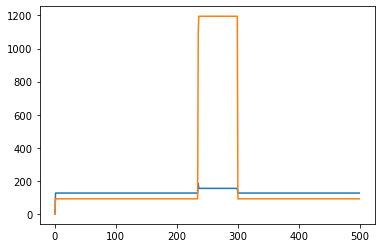

In [635]:
plt.plot(booster_doses3['19_49_diff'])
plt.plot(booster_doses3['50_64_diff'])



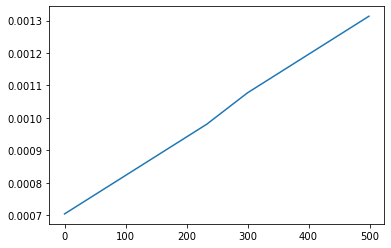

In [636]:
plt.plot((booster_doses3['19_49'] + booster_doses3['19_49'] + booster_doses3['19_49'])/np.sum(data_dem))

In [603]:
date_series_str[0]

'10/01/2021'

In [122]:
Num = np.zeros([106,])

for i in range(106):
    data = date_to = date_series_str[i]
    init_cov_65 = get_info(data, state, data2_nec, 'Additional_Doses_65Plus')   
    init_cov_50_64 = get_info(data, state, data2_nec, 'Additional_Doses_50Plus') - get_info(data, state, data2_nec, 'Additional_Doses_65Plus')   
    init_cov_19_49 =  get_info(data, state, data2_nec, 'Additional_Doses_18Plus') - get_info(data, state, data2_nec, 'Additional_Doses_50Plus')        
    Num[i] = init_cov_65 + init_cov_50_64 + init_cov_50_64

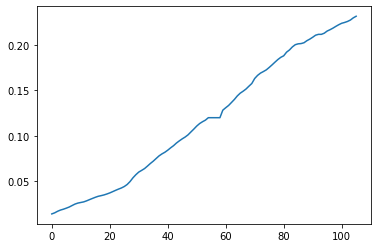

In [124]:
plt.plot(Num/np.sum(data_dem))

In [527]:
state_series

0     AL
1     AK
2     AZ
3     AR
4     CA
5     CO
6     CT
7     DE
8     DC
9     FL
10    GA
11    HI
12    ID
13    IL
14    IN
15    IA
16    KS
17    KY
18    LA
19    ME
20    MD
21    MA
22    MI
23    MN
24    MS
25    MO
26    MT
27    NE
28    NV
29    NH
30    NJ
31    NM
32    NY
33    NC
34    ND
35    OH
36    OK
37    OR
38    PA
39    RI
40    SC
41    SD
42    TN
43    TX
44    UT
45    VT
46    VA
47    WA
48    WI
49    WY
50    US
Name: state, dtype: object

In [586]:
def set_vacc(state):
    deb_date = '02/07/2022'
    end_date = '04/25/2022'
    data_dem = (get_pop(state, data_dem2, '0_4'), get_pop(state, data_dem2, '5_11'), get_pop(state, data_dem2, '12_18'), get_pop(state, data_dem2, '19_49'), get_pop(state, data_dem2, '50_64'), get_pop(state, data_dem2, '65+'))
    primary_series = primary(state)
    booster_dose = booster(state)
    booster_dose2 = booster5(state)
    return primary_series, booster_dose, booster_dose2

In [587]:
primary_series, booster_dose, booster_dose2 = set_vacc('IL')

(23533718.75, 32947206.25, 18826975, 127653910.526316, 63503489.4736842, 52784300)
0
0
0


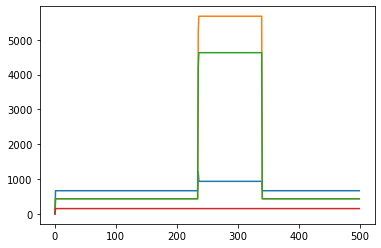

In [626]:
plt.plot(booster_dose2['19_49_diff'])
plt.plot(booster_dose2['50_64_diff'])
plt.plot(booster_dose2['65_diff'])
plt.plot(booster_dose2['12_18_diff'])

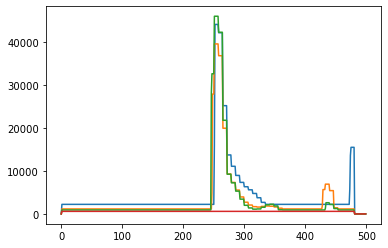

In [582]:
plt.plot(booster_dose['19_49_diff'])
plt.plot(booster_dose['50_64_diff'])
plt.plot(booster_dose['65_diff'])
plt.plot(booster_dose['12_18_diff'])

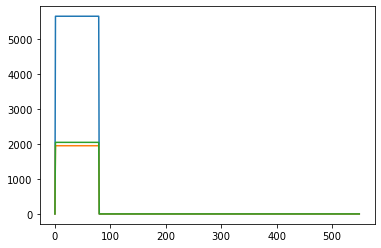

In [583]:
plt.plot(primary_series['19_49_diff'])
plt.plot(primary_series['50_64_diff'])
plt.plot(primary_series['65_diff'])

In [637]:
listo = list(state_series)
for x in listo:
    
    
    x = x.strip()
    state = x
    data_dem = (get_pop(state, data_dem2, '0_4'), get_pop(state, data_dem2, '5_11'), get_pop(state, data_dem2, '12_18'), get_pop(state, data_dem2, '19_49'), get_pop(state, data_dem2, '50_64'), get_pop(state, data_dem2, '65+'))
    
    primary_series, booster_dose, booster_dose2 = set_vacc(x)
    y = "vacc_data/primary_" + x + ".csv"
    y1 = "vacc_data/boost_flu_" + x + ".csv"
    y2 = "vacc_data/boost_cov_" + x + ".csv"
    primary_series.to_csv(y)
    booster_dose.to_csv(y1)
    booster_dose2.to_csv(y2)

(352531.25, 493543.75, 282025, 1844747.36842105, 959552.631578947, 834700)
0
0
0
(56781.25, 79493.75, 45425, 290200.0, 138300.0, 91500)
0
0
0
(531750.0, 744450.0, 425400, 2775900.0, 1327000.0, 1293600)
0
0
0
(225250.0, 315350.0, 180200, 1122352.63157895, 573647.368421053, 505700)
0
0
0
(2866031.25, 4012443.75, 2292825, 16309168.4210526, 7423231.57894737, 5739000)
0
0
0
(404500.0, 566300.0, 323600, 2387763.15789474, 1098336.84210526, 831300)
0
0
0
(233968.75, 327556.25, 187175, 1347994.73684211, 746205.263157895, 610400)
0
0
0
(64187.5, 89862.5, 51350, 354310.526315789, 195489.473684211, 185200)
0
0
0
(40875.0, 57225.0, 32700, 338521.052631579, 116778.947368421, 85300)
0
0
0
(1367718.75, 1914806.25, 1094175, 7937705.2631579, 4250794.73684211, 4426900)
0
0
0
(813281.25, 1138593.75, 650625, 4191794.73684211, 2006405.26315789, 1493300)
0
0
0
(95562.5, 133787.5, 76450, 504463.157894737, 267736.842105263, 265000)
0
0
0
(146250.0, 204750.0, 117000, 670084.210526316, 329415.789473684, 283500)


In [640]:
    x = 'WV'
    x = x
    data_dem = (get_pop(state, data_dem2, '0_4'), get_pop(state, data_dem2, '5_11'), get_pop(state, data_dem2, '12_18'), get_pop(state, data_dem2, '19_49'), get_pop(state, data_dem2, '50_64'), get_pop(state, data_dem2, '65+'))
    
    primary_series, booster_dose, booster_dose2 = set_vacc(x)
    y = "vacc_data/primary_" + x + ".csv"
    y1 = "vacc_data/boost_flu_" + x + ".csv"
    y2 = "vacc_data/boost_cov_" + x + ".csv"
    primary_series.to_csv(y)
    booster_dose.to_csv(y1)
    booster_dose2.to_csv(y2)

(115000.0, 161000.0, 92000, 644900.0, 369000.0, 357200)
0
0
0
